In [27]:
import numpy as np
import pandas as pd
import cv2
import os 
import fnmatch
import keras

In [2]:
Lab_tested_data = pd.read_csv('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Dataset RGB\\Lab_tested_data.csv')
Lab_tested_data = Lab_tested_data.fillna(method='ffill')
Lab_tested_data.to_csv("Pre_processed_lab_tested_data.csv")

In [3]:
Sample_ID = Lab_tested_data.iloc[:,0]
P_Value = Lab_tested_data.iloc[:,5]

In [4]:
def load_images_from_folder(folder):
    Labels = []
    for filename in os.listdir(folder):
        x = filename.split("_")
        id = float(x[0])
        img = cv2.imread(os.path.join(folder,filename))
        img = img[100:1100,100:1100]
        kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
        img = cv2.filter2D(img, -1, kernel) # applying the sharpening kernel.
        Result = Sample_ID.isin([id])
        Result = Sample_ID[Result];
        if len(Result) > 1:
            Result = Sample_ID[Sample_ID==Result.iloc[1]].index.tolist()
            Id_1_index = Result[0]
            Id_2_index = Result[1]
            print(id)
            Labels.append([filename,img,(P_Value[Id_1_index]+P_Value[Id_2_index])/2])
        else:
            continue
    return Labels

In [5]:
dataset = load_images_from_folder('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Dataset RGB\\testing_data')

110638.0
110638.0
110639.0
110639.0
110640.0
110640.0
110641.0
110641.0
110642.0
110642.0
110643.0
110643.0
110644.0
110644.0
110645.0
110645.0
110646.0
110646.0
110648.0
110648.0
110649.0
110649.0
110650.0
110650.0
110651.0
110651.0
110652.0
110652.0
110653.0
110653.0
110654.0
110654.0
110655.0
110655.0
110656.0
110656.0
110657.0
110657.0
110658.0
110658.0
110659.0
110659.0
110660.0
110660.0
110661.0
110661.0
110662.0
110662.0
110663.0
110663.0
110664.0
110664.0
110665.0
110665.0
110667.0
110667.0
110734.0
110734.0
110735.0
110735.0
110736.0
110736.0
110737.0
110737.0
110738.0
110738.0
110740.0
110740.0
110745.0
110745.0
110746.0
110746.0
110747.0
110747.0
110749.0
110749.0
110750.0
110750.0
110752.0
110752.0
110753.0
110753.0
110755.0
110755.0
110756.0
110756.0
110757.0
110757.0
110759.0
110759.0
110760.0
110760.0
110761.0
110761.0
110762.0
110762.0
110763.0
110763.0
110766.0
110766.0
110767.0
110767.0
110768.0
110768.0
110773.0
110773.0
110775.0
110775.0
110776.0
110776.0
110777.0
1

In [6]:
P_index = []
for data in dataset:
    image = data[1]
    # extracting blue,red,green channel from color image
    blue_channel = image[:,:,0]
    green_channel = image[:,:,1]
    red_channel = image[:,:,2]
    temp = ((np.median(green_channel)+np.median(blue_channel))+np.median(red_channel))
    temp = np.nanmean(temp)
    print(temp)
    P_index.append([temp,data[2]])

475.0
513.0
540.0
508.0
506.0
559.0
299.0
307.0
459.0
539.0
485.0
463.0
509.0
522.0
504.0
520.0
533.0
531.0
490.0
456.0
506.0
553.0
495.0
518.0
520.0
534.0
546.0
545.0
464.0
483.0
446.0
481.0
484.0
532.0
519.0
498.0
485.0
527.0
497.0
506.0
566.0
569.0
544.0
546.0
519.0
492.0
496.0
517.0
482.0
550.0
482.0
474.0
488.0
557.0
486.0
504.0
379.0
440.0
488.0
485.0
421.0
507.0
418.0
518.0
449.0
395.0
513.0
479.0
528.0
463.0
509.0
373.0
499.0
514.0
476.0
529.0
472.0
505.0
431.0
539.0
492.0
545.0
584.0
519.0
520.0
419.0
515.0
468.0
415.0
460.0
540.0
561.0
517.0
500.0
552.0
534.0
437.0
489.0
484.0
524.0
440.0
281.0
463.0
404.0
444.0
399.0
428.0
339.0
367.0
368.0
320.0
470.0
472.0
424.0
492.0
457.0
433.0
449.0
488.0
555.0
433.0
425.0
419.0
421.0
417.0
397.0
435.0
423.0
499.0
456.0
457.0
439.0
440.0
473.0
536.0
516.0
474.0
429.0
445.0
339.0
495.0
370.0
553.0
541.0
529.0
529.0
545.0
459.0
461.0
544.0
490.0
499.0
505.0
556.0
522.0
529.0
564.0
566.0
502.0
546.0
531.0
536.0
299.0
365.0
480.0
511.0
413.

In [7]:
data1 = pd.DataFrame(P_index,columns=['P_Index','P_Value'])

In [8]:
data1.to_csv("P_Index_with_P_value.csv")

print(data1)

     P_Index  P_Value
0      475.0     5.40
1      513.0     5.40
2      540.0     4.90
3      508.0     4.90
4      506.0     4.20
..       ...      ...
696    429.0     4.55
697    633.0     5.10
698    420.0     5.10
699    333.0     5.35
700    308.0     5.35

[701 rows x 2 columns]


In [10]:
P_index = data1.iloc[:,0]
print(P_index)

0      475.0
1      513.0
2      540.0
3      508.0
4      506.0
       ...  
696    429.0
697    633.0
698    420.0
699    333.0
700    308.0
Name: P_Index, Length: 701, dtype: float64


In [12]:
P_value = data1.iloc[:,1]
print(P_value)

0      5.40
1      5.40
2      4.90
3      4.90
4      4.20
       ... 
696    4.55
697    5.10
698    5.10
699    5.35
700    5.35
Name: P_Value, Length: 701, dtype: float64


In [18]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
import pandas as pd
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

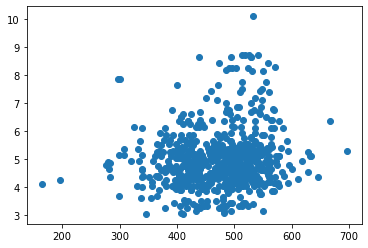

In [19]:
#Output variable or Tested
y1 = np.array(P_value)
plt.scatter(P_index,P_value)

In [20]:
#Input featuree
x1 = np.array(P_index)

In [21]:
X_train, X_val, y_train, y_val = train_test_split(x1, y1)

In [55]:
model = Sequential()
model.add(Dense(32, input_dim=1, kernel_initializer='normal', activation='relu'))
model.add(Dense(2670, activation='relu'))
model.add(Dense(2670, activation='relu'))
model.add(Dense(2670, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 32)                64        
_________________________________________________________________
dense_28 (Dense)             (None, 2670)              88110     
_________________________________________________________________
dense_29 (Dense)             (None, 2670)              7131570   
_________________________________________________________________
dense_30 (Dense)             (None, 2670)              7131570   
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 2671      
Total params: 14,353,985
Trainable params: 14,353,985
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae','accuracy'])
history=model.fit(X_train, y_train, epochs=200, batch_size=128, verbose=1, validation_split=0.3)
predictions = model.predict(X_val)

Epoch 1/200
3/3 [==============================] - 1s 74ms/step - loss: 3842.3640 - mse: 3842.3640 - mae: 42.2479 - accuracy: 0.0000e+00 - val_loss: 66.3393 - val_mse: 66.3393 - val_mae: 8.0648 - val_accuracy: 0.0000e+00
Epoch 2/200
3/3 [==============================] - 0s 30ms/step - loss: 53.0631 - mse: 53.0631 - mae: 7.0148 - accuracy: 0.0000e+00 - val_loss: 1.8858 - val_mse: 1.8858 - val_mae: 1.1164 - val_accuracy: 0.0000e+00
Epoch 3/200
3/3 [==============================] - 0s 30ms/step - loss: 12.7418 - mse: 12.7418 - mae: 2.9920 - accuracy: 0.0000e+00 - val_loss: 1.5468 - val_mse: 1.5468 - val_mae: 0.9462 - val_accuracy: 0.0000e+00
Epoch 4/200
3/3 [==============================] - 0s 29ms/step - loss: 7.9927 - mse: 7.9927 - mae: 2.4420 - accuracy: 0.0000e+00 - val_loss: 2.4326 - val_mse: 2.4326 - val_mae: 1.1667 - val_accuracy: 0.0000e+00
Epoch 5/200
3/3 [==============================] - 0s 28ms/step - loss: 3.7844 - mse: 3.7844 - mae: 1.5968 - accuracy: 0.0000e+00 - val_los

3/3 [==============================] - 0s 27ms/step - loss: 1.3838 - mse: 1.3838 - mae: 0.8880 - accuracy: 0.0000e+00 - val_loss: 1.5347 - val_mse: 1.5347 - val_mae: 0.9322 - val_accuracy: 0.0000e+00
Epoch 40/200
3/3 [==============================] - 0s 27ms/step - loss: 1.3695 - mse: 1.3695 - mae: 0.8938 - accuracy: 0.0000e+00 - val_loss: 1.5355 - val_mse: 1.5355 - val_mae: 0.9405 - val_accuracy: 0.0000e+00
Epoch 41/200
3/3 [==============================] - 0s 27ms/step - loss: 1.3735 - mse: 1.3735 - mae: 0.9022 - accuracy: 0.0000e+00 - val_loss: 1.5396 - val_mse: 1.5396 - val_mae: 0.9261 - val_accuracy: 0.0000e+00
Epoch 42/200
3/3 [==============================] - 0s 27ms/step - loss: 1.3822 - mse: 1.3822 - mae: 0.8848 - accuracy: 0.0000e+00 - val_loss: 1.5332 - val_mse: 1.5332 - val_mae: 0.9316 - val_accuracy: 0.0000e+00
Epoch 43/200
3/3 [==============================] - 0s 26ms/step - loss: 1.4136 - mse: 1.4136 - mae: 0.9294 - accuracy: 0.0000e+00 - val_loss: 1.5330 - val_mse: 

3/3 [==============================] - 0s 26ms/step - loss: 1.3764 - mse: 1.3764 - mae: 0.9052 - accuracy: 0.0000e+00 - val_loss: 1.5158 - val_mse: 1.5158 - val_mae: 0.9329 - val_accuracy: 0.0000e+00
Epoch 78/200
3/3 [==============================] - 0s 27ms/step - loss: 1.3850 - mse: 1.3850 - mae: 0.8883 - accuracy: 0.0000e+00 - val_loss: 1.5239 - val_mse: 1.5239 - val_mae: 0.9177 - val_accuracy: 0.0000e+00
Epoch 79/200
3/3 [==============================] - 0s 28ms/step - loss: 1.3571 - mse: 1.3571 - mae: 0.8917 - accuracy: 0.0000e+00 - val_loss: 1.5154 - val_mse: 1.5154 - val_mae: 0.9338 - val_accuracy: 0.0000e+00
Epoch 80/200
3/3 [==============================] - 0s 26ms/step - loss: 1.3490 - mse: 1.3490 - mae: 0.8861 - accuracy: 0.0000e+00 - val_loss: 1.5360 - val_mse: 1.5360 - val_mae: 0.9154 - val_accuracy: 0.0000e+00
Epoch 81/200
3/3 [==============================] - 0s 27ms/step - loss: 1.3561 - mse: 1.3561 - mae: 0.8767 - accuracy: 0.0000e+00 - val_loss: 1.5184 - val_mse: 

3/3 [==============================] - 0s 27ms/step - loss: 1.3326 - mse: 1.3326 - mae: 0.8731 - accuracy: 0.0000e+00 - val_loss: 1.4919 - val_mse: 1.4919 - val_mae: 0.9128 - val_accuracy: 0.0000e+00
Epoch 116/200
3/3 [==============================] - 0s 27ms/step - loss: 1.3311 - mse: 1.3311 - mae: 0.8770 - accuracy: 0.0000e+00 - val_loss: 1.4888 - val_mse: 1.4888 - val_mae: 0.9158 - val_accuracy: 0.0000e+00
Epoch 117/200
3/3 [==============================] - 0s 26ms/step - loss: 1.3372 - mse: 1.3372 - mae: 0.8798 - accuracy: 0.0000e+00 - val_loss: 1.4908 - val_mse: 1.4908 - val_mae: 0.9119 - val_accuracy: 0.0000e+00
Epoch 118/200
3/3 [==============================] - 0s 27ms/step - loss: 1.3915 - mse: 1.3915 - mae: 0.8957 - accuracy: 0.0000e+00 - val_loss: 1.5079 - val_mse: 1.5079 - val_mae: 0.9065 - val_accuracy: 0.0000e+00
Epoch 119/200
3/3 [==============================] - 0s 26ms/step - loss: 1.3356 - mse: 1.3356 - mae: 0.8852 - accuracy: 0.0000e+00 - val_loss: 1.5098 - val_m

3/3 [==============================] - 0s 26ms/step - loss: 1.3588 - mse: 1.3588 - mae: 0.9054 - accuracy: 0.0000e+00 - val_loss: 1.4869 - val_mse: 1.4869 - val_mae: 0.8967 - val_accuracy: 0.0000e+00
Epoch 154/200
3/3 [==============================] - 0s 26ms/step - loss: 1.3949 - mse: 1.3949 - mae: 0.8681 - accuracy: 0.0000e+00 - val_loss: 1.5166 - val_mse: 1.5166 - val_mae: 0.9604 - val_accuracy: 0.0000e+00
Epoch 155/200
3/3 [==============================] - 0s 27ms/step - loss: 1.4002 - mse: 1.4002 - mae: 0.9370 - accuracy: 0.0000e+00 - val_loss: 1.5931 - val_mse: 1.5931 - val_mae: 0.9028 - val_accuracy: 0.0000e+00
Epoch 156/200
3/3 [==============================] - 0s 26ms/step - loss: 1.3849 - mse: 1.3849 - mae: 0.8790 - accuracy: 0.0000e+00 - val_loss: 1.4813 - val_mse: 1.4813 - val_mae: 0.9362 - val_accuracy: 0.0000e+00
Epoch 157/200
3/3 [==============================] - 0s 26ms/step - loss: 1.3403 - mse: 1.3403 - mae: 0.9030 - accuracy: 0.0000e+00 - val_loss: 1.5586 - val_m

3/3 [==============================] - 0s 28ms/step - loss: 1.2828 - mse: 1.2828 - mae: 0.8554 - accuracy: 0.0000e+00 - val_loss: 1.4604 - val_mse: 1.4604 - val_mae: 0.9320 - val_accuracy: 0.0000e+00
Epoch 192/200
3/3 [==============================] - 0s 28ms/step - loss: 1.3073 - mse: 1.3073 - mae: 0.8787 - accuracy: 0.0000e+00 - val_loss: 1.4601 - val_mse: 1.4601 - val_mae: 0.8845 - val_accuracy: 0.0000e+00
Epoch 193/200
3/3 [==============================] - 0s 28ms/step - loss: 1.3048 - mse: 1.3048 - mae: 0.8517 - accuracy: 0.0000e+00 - val_loss: 1.4681 - val_mse: 1.4681 - val_mae: 0.9385 - val_accuracy: 0.0000e+00
Epoch 194/200
3/3 [==============================] - 0s 28ms/step - loss: 1.3193 - mse: 1.3193 - mae: 0.8895 - accuracy: 0.0000e+00 - val_loss: 1.4718 - val_mse: 1.4718 - val_mae: 0.8827 - val_accuracy: 0.0000e+00
Epoch 195/200
3/3 [==============================] - 0s 27ms/step - loss: 1.3076 - mse: 1.3076 - mae: 0.8520 - accuracy: 0.0000e+00 - val_loss: 1.4312 - val_m

dict_keys(['loss', 'mse', 'mae', 'accuracy', 'val_loss', 'val_mse', 'val_mae', 'val_accuracy'])


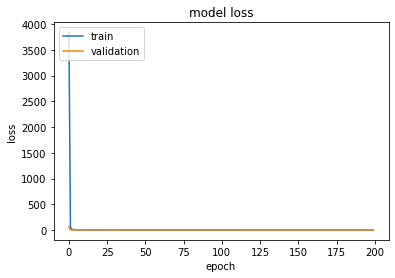

In [57]:

print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')


plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

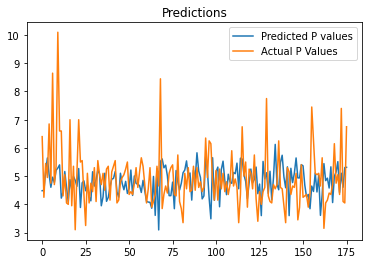

In [58]:

plt.plot(predictions)
plt.plot(y_val)
plt.title('Predictions')
plt.legend(['Predicted P values', 'Actual P Values'], loc='upper right')
plt.show()